# Import Libraries

In [1]:
# Python Structs Type using for Wide Variety Mathematical Operations Like Arrays
import numpy as np 

# Working with the DataFrame
import pandas as pd

#Dealing With Warnings
import warnings

#from sklearn import preprocessing

In [ ]:
# Importing the Model_SVM libarys

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
#Store the data into the variable df

df = pd.read_csv('Bit_AfterClean.csv')

#Do not show warnings
warnings.filterwarnings("ignore")

In [3]:
#A variable for predicting 'n' days out into the future
prediction_days = 30 #n = 30 days

#Create another column (the target or dependent variable)
df['PREDICTION'] = df[['CLOSE']].shift(-prediction_days)

In [4]:
df.drop(['Unnamed: 0'], 1, inplace=True)

In [5]:
df = df.drop(["CLOSE","TRENDS MEAN","UP|DOWN", "POSITVE ANALZE TWEETS","NEGATIVE ANALZE TWEETS","CHANGE"], axis =1)

In [6]:
#CREATE THE INDEPENDENT DATA SET (X)

# Convert the dataframe to a numpy array and drop the prediction column
X = np.array(df.drop(['PREDICTION'],1))

#Remove the last 'n' rows where 'n' is the prediction_days
X= X[:len(df)-prediction_days]

In [7]:
df

,OPEN,HIGH,LOW,MEAN HIGH-LOW,MEAN CLOSE-OPEN,PREDICTION
0,47666.0,48264.0,46982.0,47623.0,47781.0,59071.0
1,51041.0,52191.0,50846.0,51518.5,51035.0,57099.0
2,50770.0,51407.0,50016.0,50711.5,50904.0,57937.0
3,51249.0,51437.0,50751.0,51094.0,51012.0,56449.0
4,50907.0,51795.0,50747.0,51271.0,50971.5,58792.0
...,...,...,...,...,...,...
3191,10.0,10.0,10.0,10.0,10.0,NaN
3192,11.7,11.7,11.7,11.0,11.0,NaN
3193,11.7,11.7,11.7,11.0,11.0,NaN
3194,11.7,11.7,11.7,11.0,11.0,NaN


In [8]:
#CREATE THE DEPENDENT DATA SET (y) 
# Convert the dataframe to a numpy array (All of the values including the NaN's) y = np.array(df['Prediction'])  
# Get all of the y values except the last 'n' rows 
y = np.array(df['PREDICTION']) 
y = y[:-prediction_days] 

# Prepring X,y

In [9]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set prediction_days_array equal to the last 30 rows of the original data set from the price column
prediction_days_array = np.array(df.drop(['PREDICTION'],1))[:prediction_days]

# Creating and train the Support Vector Models 

In [19]:
# Best Params To SVR_Models
Cs = [100,1000,10000]
gammas = [1e-07,1e-06,1e-05]
param_grid = {'gamma' : gammas, 'C': Cs}
grid_search = GridSearchCV(svm.SVR(), param_grid, cv=5)
grid_search.fit(X, y)
grid_search.best_params_
print(grid_search.best_params_)

{'C': 10000, 'gamma': 1e-07}


In [20]:
# Create and train the Support Vector Machine 
svr_rbf = SVR(C=10000, gamma= 1e-07)#Create the model
svr_rbf.fit(x_train, y_train) #Train the model

SVR(C=10000, gamma=1e-07)

# Predict's Results

In [21]:
# Testing Model: Score returns the accuracy of the prediction. 
# The best possible score is 1.0
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print("svr_rbf accuracy: ", svr_rbf_confidence)

svr_rbf accuracy:  0.9124457304261413


In [22]:
# Print the model predictions for the next 'n=30' days
svm_prediction = svr_rbf.predict(prediction_days_array)

In [23]:
svm_prediction

array([44417.47658603, 48594.87627391, 51090.03804484, 50980.65556624,
       49465.02460304, 37744.87125123, 38362.08266744, 43389.13468185,
       34749.72843355, 43191.14218102, 37942.54746604, 40137.22756529,
       40726.02283178, 41648.22770925, 43645.1006054 , 41627.36786412,
       42100.58312384, 41784.45299255, 43188.49409778, 51613.37738308,
       48766.46084244, 44470.2053064 , 40775.43827314, 43064.96766241,
       57801.6963753 , 58993.54094698, 57497.42787836, 57144.55504165,
       48736.58176271, 49916.64977694])

Text(0, 0.5, '$ Close')

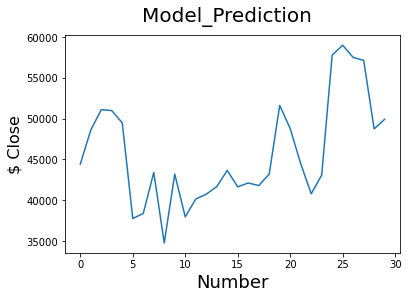

In [24]:
# Plot for the next 'n=30' days
import matplotlib.pyplot as plt
plt.plot(svm_prediction)
plt.suptitle('Model_Prediction', fontsize=20)  
plt.xlabel('Number', fontsize=18)                     
plt.ylabel('$ Close', fontsize=16)   